In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score

In [26]:
df = pd.read_csv('GB_Cleaned_dataset.csv')

In [27]:
df.columns

Index(['customer_number', 'Division', 'Customer_Type1', 'Customer_Type',
       'YearMonth', 'Monthly_SKUs_Purchased', 'Monthly_Vendors_Purchased',
       'Monthly_Number_of_Sales', 'Monthly_Last_Sales_Date',
       'Monthly_First_Sales_Date', 'Monthly_Sales_Days', 'Monthly_Sum_Sales',
       'Monthly_Gross_Margin', 'new_yearMonth', 'difference', 'churn',
       'Backlog_Sales'],
      dtype='object')

In [ ]:
# X value = 'Customer_Type','Division','Monthly_SKUs_Purchased','Monthly_Vendors_Purchased','Monthly_Number_of_Sales',
#'Monthly_Sales_Days', 'Monthly_Sum_Sales','Monthly_Gross_Margin'

# X_cat = 'Customer_Type','Division'

# X_num = 'Monthly_SKUs_Purchased','Monthly_Vendors_Purchased','Monthly_Number_of_Sales',
#'Monthly_Sales_Days', 'Monthly_Sum_Sales','Monthly_Gross_Margin'

# Target value = 'churn'

In [28]:
X_cat=df[['Division','Customer_Type']]

Y=df['churn']

In [29]:
xc_train, xc_test, y_train, y_test = train_test_split(X_cat, Y, test_size = 0.3, random_state = 42)

In [30]:
# Define & fit the model
nb_cat = MultinomialNB(alpha=0.1)
nb_cat.fit(xc_train, y_train)

# Create predictions and calculate accuracy for training data
y_pred_train = nb_cat.predict(xc_train)
print('training accuracy is', round(accuracy_score(y_train, y_pred_train),4))

# Create predictions and calculate accuracy for testing data
y_pred_test = nb_cat.predict(xc_test)
print('testing accuracy is', round(accuracy_score(y_test, y_pred_test),4))

training accuracy is 0.5531
testing accuracy is 0.5506


In [31]:
X_num = df[['Monthly_SKUs_Purchased','Monthly_Vendors_Purchased','Monthly_Number_of_Sales',
      'Monthly_Sales_Days', 'Monthly_Sum_Sales','Monthly_Gross_Margin']]
xn_train, xn_test, y_train, y_test = train_test_split(X_num, Y, test_size = 0.3, random_state = 42)

In [32]:
# Define & fit the model
nb_num = GaussianNB()
nb_num.fit(xn_train, y_train)

# Create predictions and calculate accuracy for training data
y_pred_train = nb_num.predict(xn_train)
print('training accuracy is', round(accuracy_score(y_train, y_pred_train),4))

# Create predictions and calculate accuracy for testing data
y_pred_test = nb_num.predict(xn_test)
print('testing accuracy is', round(accuracy_score(y_test, y_pred_test),4))

training accuracy is 0.5151
testing accuracy is 0.5163


In [33]:
import matplotlib.pyplot as plt

In [34]:
# Calculate probabilities for each model
cat_probs = nb_cat.predict_proba(xc_test)
num_probs = nb_num.predict_proba(xn_test)

# cat_probs and num_probs have 2 columns, one for Prob(Y=0)
# and another column for Prob(Y=1) 
# Keep only the probailities for the positive (Y=1) outcome
# so that we can use roc_auc_score with them
cat_probs = cat_probs[:,1]
num_probs = num_probs[:,1]

# Calculate area under the ROC curves
nbcat_auc = roc_auc_score(y_test, cat_probs)
nbnum_auc = roc_auc_score(y_test, num_probs)
print('Naive Bayes with categorical variables: AUC =', round(nbcat_auc,4))
print('Naive Bayes with numerical variables: AUC =', round(nbnum_auc,4))

Naive Bayes with categorical variables: AUC = 0.5037
Naive Bayes with numerical variables: AUC = 0.6918


In [35]:
# Calculate false positive rate and true positive rate
c_fpr, c_tpr, _ = roc_curve(y_test, cat_probs)
n_fpr, n_tpr, _ = roc_curve(y_test, num_probs)

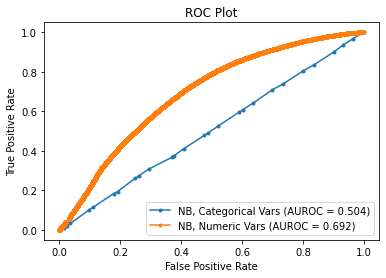

In [36]:
# Plot the ROC curve)
plt.plot(c_fpr, c_tpr, marker='.', label='NB, Categorical Vars (AUROC = %0.3f)' % nbcat_auc)
plt.plot(n_fpr, n_tpr, marker='.', label='NB, Numeric Vars (AUROC = %0.3f)' % nbnum_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

In [37]:
X_cat.columns

Index(['Division', 'Customer_Type'], dtype='object')

In [38]:
X_num.columns

Index(['Monthly_SKUs_Purchased', 'Monthly_Vendors_Purchased',
       'Monthly_Number_of_Sales', 'Monthly_Sales_Days', 'Monthly_Sum_Sales',
       'Monthly_Gross_Margin'],
      dtype='object')

In [39]:
X = X_cat
X[['Monthly_SKUs_Purchased','Monthly_Vendors_Purchased','Monthly_Number_of_Sales',
      'Monthly_Sales_Days', 'Monthly_Sum_Sales','Monthly_Gross_Margin']]=X_num
np.shape(X)

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


(389148, 8)

In [44]:
pip install mixed-naive-bayes

Note: you may need to restart the kernel to use updated packages.


In [45]:
X.columns

Index(['Division', 'Customer_Type', 'Monthly_SKUs_Purchased',
       'Monthly_Vendors_Purchased', 'Monthly_Number_of_Sales',
       'Monthly_Sales_Days', 'Monthly_Sum_Sales', 'Monthly_Gross_Margin'],
      dtype='object')

In [58]:
x_train.head

<bound method NDFrame.head of         Division  Customer_Type  Monthly_SKUs_Purchased  \
87039          2              2                       8   
367571         9              1                      11   
168431         7              2                     159   
266341         3              2                      12   
274978         8              1                      27   
...          ...            ...                     ...   
259178         7              1                       0   
365838         8              2                      67   
131932         8              2                       0   
146867         6              2                       2   
121958         7              2                       6   

        Monthly_Vendors_Purchased  Monthly_Number_of_Sales  \
87039                           3                        3   
367571                          8                        3   
168431                         33                       17   
266341       

In [56]:
from mixed_naive_bayes import MixedNB

# Define & fit the model
nb_mix = MixedNB(categorical_features=[0,1])
nb_mix.fit(x_train, y_train)

# Create predictions and calculate accuracy for training data
y_pred_train = nb_mix.predict(x_train)
print('training accuracy is', round(accuracy_score(y_train, y_pred_train),4))

# Create predictions and calculate accuracy for testing data
y_pred_test = nb_mix.predict(x_test)
print('testing accuracy is', round(accuracy_score(y_test, y_pred_test),4))

ValueError: Expected feature no. 0 to have [0 1 2 3 4 5 6 7 8 9] as unique values, but got [1 2 3 4 5 6 7 8 9] instead. Encode your data using sklearn's LabelEncoder, or specify the maximum no. of categories this feature can take.

In [57]:
y_train.head

<bound method NDFrame.head of 87039     1
367571    0
168431    0
266341    1
274978    0
         ..
259178    1
365838    0
131932    0
146867    1
121958    0
Name: churn, Length: 272403, dtype: int64>